# Monthly Momentum Strategy

## Import libraries

In [ ]:
pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import requests
import bs4 as bs
from scipy import stats
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

## Load stock data

In [3]:
resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'id': 'constituents'})
tickers = []

for row in table.find_all('tr')[1:]:
		ticker = row.find('td').text.strip()
		if "." in ticker:
			ticker = ticker.replace('.','-')
		tickers.append(ticker)

In [4]:
df = yf.download(tickers=tickers, period="max", interval="1d", group_by="ticker", auto_adjust=True)
df

[*********************100%***********************]  505 of 505 completed


DHI                        ...        PSX                        
                 Open       High        Low  ...        Low      Close       Volume
Date                                         ...                                   
1962-01-02        NaN        NaN        NaN  ...        NaN        NaN          NaN
1962-01-03        NaN        NaN        NaN  ...        NaN        NaN          NaN
1962-01-04        NaN        NaN        NaN  ...        NaN        NaN          NaN
1962-01-05        NaN        NaN        NaN  ...        NaN        NaN          NaN
1962-01-08        NaN        NaN        NaN  ...        NaN        NaN          NaN
...               ...        ...        ...  ...        ...        ...          ...
2021-08-05  95.807238  96.904914  95.517850  ...  72.120003  73.370003  218290000.0
2021-08-06  96.246304  96.974766  94.150741  ...  73.389999  73.959999  180790000.0
2021-08-09  94.300003  95.389999  93.589996  ...  72.570000  73.010002  222070000.0
2021-08-10  94.309998  96.980003  94.010002  ...  73.110001  74.230003  282380000.0
2021-08-11  95.690002  96.750000  95.419998  ...  73.500000  73.910004     316833.0

[15025 rows x 2525 columns]

In [5]:
df.columns

MultiIndex([('DHI',   'Open'),
            ('DHI',   'High'),
            ('DHI',    'Low'),
            ('DHI',  'Close'),
            ('DHI', 'Volume'),
            ( 'PG',   'Open'),
            ( 'PG',   'High'),
            ( 'PG',    'Low'),
            ( 'PG',  'Close'),
            ( 'PG', 'Volume'),
            ...
            ( 'FB',   'Open'),
            ( 'FB',   'High'),
            ( 'FB',    'Low'),
            ( 'FB',  'Close'),
            ( 'FB', 'Volume'),
            ('PSX',   'Open'),
            ('PSX',   'High'),
            ('PSX',    'Low'),
            ('PSX',  'Close'),
            ('PSX', 'Volume')],
           length=2525)

In [6]:
df = df.loc[:, df.columns.get_level_values(1)=="Close"]
df.columns = df.columns.get_level_values(0)
df = df.loc["2016-01-01":"2021-01-01",:]
df

,DHI,PG,FTV,PAYX,O,FANG,ICE,AAP,L,ESS,EMN,CRM,GRMN,AIG,RMD,LW,AEE,FRT,GIS,AVGO,CMI,HRL,MA,WU,OKE,PFE,ULTA,BLK,HLT,LIN,OTIS,MGM,WYNN,NTAP,ALL,CNP,EOG,AON,ZBH,WMB,...,AVY,JCI,WY,WAT,GOOG,F,UDR,LEN,GPN,ES,FDX,BF-B,BBWI,UHS,NSC,STT,MTD,WRK,RJF,SPG,TXN,MSI,IPG,LLY,GD,AMGN,MAS,ROL,EVRG,MPC,TER,AMZN,NWS,LNT,PAYC,PCAR,MLM,ZTS,FB,PSX
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-04,28.383097,66.213150,NaN,43.042988,40.278336,62.475643,46.520077,148.810074,36.651855,201.042252,56.714279,76.709999,29.610424,52.049034,48.246014,NaN,36.630672,120.085815,46.846497,119.034859,76.698807,34.528290,91.509880,14.390905,17.150225,24.374844,181.809998,289.669342,41.434040,90.668755,NaN,21.026794,62.285862,22.305960,54.327209,14.727194,63.459541,85.231369,97.487808,18.573154,...,55.034275,25.279858,24.467394,130.350006,741.840027,10.854503,30.526442,44.551083,62.009846,43.096661,134.566605,35.439915,NaN,115.731987,72.626785,56.634678,329.339996,34.040611,51.838116,147.369644,46.729744,60.592697,18.531862,72.449852,119.663292,135.709305,26.021574,10.579479,35.535671,41.725845,19.491285,636.989990,12.627891,26.099745,35.970001,39.095001,129.420639,45.514313,102.220001,65.373764
2016-01-05,28.411125,66.424355,NaN,43.009586,41.151905,61.606220,47.665546,147.793549,36.758572,203.346481,57.122852,77.050003,29.723074,52.229908,48.458557,NaN,37.064827,121.478455,46.634518,115.052567,75.948616,35.230160,91.683609,14.333732,17.163757,24.550310,182.669998,290.417236,41.453690,90.356644,NaN,21.499308,63.463280,21.774460,54.201855,14.864229,63.869358,85.748146,99.517784,18.636860,...,55.456924,24.977674,24.524813,129.809998,742.580017,10.660257,30.914526,44.627380,62.971016,43.494762,135.711212,35.458153,NaN,116.232529,73.035156,56.721619,331.380005,34.018177,51.948521,150.304169,46.239590,59.924755,18.889179,73.533936,120.164536,135.563599,25.918615,10.541844,35.762119,41.204693,19.654186,633.789978,12.110583,26.217089,34.869999,39.103294,126.914383,46.226826,102.730003,66.124817
2016-01-06,27.701303,65.782265,NaN,42.400043,41.395878,58.780594,47.239925,143.883621,35.943653,201.660690,56.016308,76.290001,28.910397,51.463345,47.497524,NaN,37.303177,122.224525,46.251335,111.513618,75.599098,35.349346,90.281288,14.007035,16.385740,24.115454,183.210007,287.112671,39.292595,89.446999,NaN,21.159100,60.175541,21.316860,53.592937,14.678831,61.310226,84.451492,99.948708,16.209040,...,54.809464,24.739111,23.983459,129.710007,743.619995,10.186296,30.691587,43.301636,63.169197,43.587933,132.070969,34.772766,NaN,113.553185,70.558357,54.834961,324.739990,33.075943,49.924313,149.936386,45.938599,59.058239,18.572464,73.070580,118.950928,134.320892,25.716669,10.399671,35.845993,39.673767,19.203796,632.650024,12.221436,26.250610,34.990002,39.111588,123.721970,46.236450,102.970001,63.700214
2016-01-07,26.645933,65.207741,NaN,40.437859,40.679699,57.079548,47.034512,145.476883,35.080227,199.669861,55.105537,74.300003,28.081621,50.231674,47.922596,NaN,37.328716,120.226707,45.281784,107.966339,74.328873,34.709267,88.627472,13.925364,15.411531,23.955240,182.979996,274.564056,37.819126,87.208611,NaN,19.486404,54.514839,20.177204,52.330357,14.388641,59.616245,83.220619,97.650581,14.588140,...,53.163834,24.110897,23.097612,128.820007,726.390015,9.867729,30.340509,41.422680,60.800964,43.316891,126.272873,34.036331,NaN,110.805153,69.244469,52.357079,315.730011,32.746895,47.863316,146.772034,44.459480,57.866791,17.995884,71.173447,115.028725,131.115387,24.542610,10.152956,35.426647,39.079308,18.695917,607.940002,12.018206,25.974028,35.540001,37.926136,123.464653,44.830688,97.919998,62.410385
2016-01-08,25.515839,64.185448,NaN,39.711426,40.270477,57.419758,46.312817,142.280579,34.827999,197.950241,54.186264,73.230003,26.995367,49.482334,48.162842,NaN,37.039280,120.425674,45.429691,107.255211,73.331444,34.506218,86.934998,13.811019,15.594192,23.650074,182.169998,267.650635,37.622654,87.262123,NaN,19.363560,52.295845,19.857752,52.142311,14.35639

In [7]:
np.sum((df.isna().any()).astype(np.int))

505

## Resample adjusted close prices by month

In [8]:
def resample_prices(close_prices, freq):
  """
    Resample close prices for each ticker at specified frequency.
    
    Parameters
    ----------
    close_prices : DataFrame
        Close prices for each ticker and date
    freq : str
        What frequency to sample at
        For valid freq choices, see http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
    
    Returns
    -------
    prices_resampled : DataFrame
        Resampled prices for each ticker and date
  """
  return close_prices.sort_index().resample(freq).apply(lambda ser: ser.iloc[-1,])

In [9]:
monthly_df = resample_prices(df, "M")
monthly_df

,DHI,PG,FTV,PAYX,O,FANG,ICE,AAP,L,ESS,EMN,CRM,GRMN,AIG,RMD,LW,AEE,FRT,GIS,AVGO,CMI,HRL,MA,WU,OKE,PFE,ULTA,BLK,HLT,LIN,OTIS,MGM,WYNN,NTAP,ALL,CNP,EOG,AON,ZBH,WMB,...,AVY,JCI,WY,WAT,GOOG,F,UDR,LEN,GPN,ES,FDX,BF-B,BBWI,UHS,NSC,STT,MTD,WRK,RJF,SPG,TXN,MSI,IPG,LLY,GD,AMGN,MAS,ROL,EVRG,MPC,TER,AMZN,NWS,LNT,PAYC,PCAR,MLM,ZTS,FB,PSX
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-31,25.693295,69.619705,NaN,40.322174,44.065590,71.396690,48.816566,148.624359,35.904842,180.533112,52.100868,68.059998,28.306919,48.646858,52.395126,NaN,38.239590,125.034805,46.432102,111.865021,76.630608,35.890774,86.103287,14.570587,17.312883,23.260998,181.169998,273.285828,34.990059,89.179466,NaN,18.976093,60.990688,18.933937,54.264538,14.404763,64.853065,82.814529,95.046066,13.660896,...,54.755512,27.532351,21.006033,121.209999,742.950012,9.470336,29.608408,40.241375,58.412926,45.569981,124.668541,35.669605,NaN,110.549973,62.586338,48.453339,312.850006,26.382969,40.309334,142.726501,45.861156,60.267738,18.223270,69.153885,118.256500,130.901123,24.786816,11.520343,36.533726,34.030514,18.619255,587.000000,12.332287,27.640491,30.150000,40.678371,119.671906,41.542034,112.209999,65.430923
2016-02-29,25.031952,68.426575,NaN,43.296204,46.391216,67.333076,44.127365,145.095673,35.325619,177.288620,54.603348,67.750000,32.595596,43.237827,52.867237,NaN,39.967697,122.738541,48.354801,112.082535,84.003899,37.948425,84.062660,14.913618,16.680420,22.862978,165.190002,271.285614,40.825005,90.775772,NaN,17.889313,75.182350,21.446369,57.120300,15.229664,59.118378,89.848526,92.700073,11.318016,...,58.887241,28.164810,21.309511,120.309998,697.770020,9.922436,28.560177,40.040882,60.406219,46.370239,128.421326,35.899281,NaN,108.419510,65.537216,47.627377,314.910004,25.546824,40.336937,146.681503,45.939140,66.333321,17.492157,63.385048,120.466576,122.792648,26.486860,11.556084,36.449860,28.183052,18.342873,552.520020,10.540179,28.744591,31.879999,42.899380,136.290146,39.621723,106.919998,65.296150
2016-03-31,28.320204,70.148087,NaN,45.503563,49.694622,72.937073,43.670284,156.786911,37.181797,199.509613,61.891190,73.830002,32.993740,46.844440,53.712593,NaN,43.035503,130.156738,52.052269,129.686462,94.653969,38.600101,91.393478,15.887948,20.753218,22.839863,193.740005,298.255768,44.458893,102.806297,NaN,20.261332,85.163506,23.561657,60.639679,17.101698,66.277611,98.485435,102.338562,11.794952,...,65.208229,29.629795,25.702948,131.919998,744.950012,10.707664,32.054279,46.170174,64.717415,49.820251,152.933853,36.024239,NaN,122.515923,74.565720,51.176537,344.760010,29.525982,43.990013,160.566513,49.751518,68.723763,18.767887,63.393833,116.134827,129.394836,29.539421,11.383983,41.976322,30.594040,20.755899,593.640015,12.345155,31.422337,35.599998,45.556637,152.430496,42.777184,114.099998,71.217926
2016-04-30,28.160948,68.841049,NaN,43.911236,47.221287,81.820328,44.578453,152.640839,38.561790,188.069321,65.447174,75.800003,35.198269,48.378471,51.836067,NaN,41.231613,126.845490,50.764801,122.341728,100.758209,34.539127,93.990906,16.472727,25.548738,25.205530,208.279999,312.057617,43.531021,105.510056,NaN,20.129025,80.487411,20.549212,58.551456,17.534962,75.609680,99.431732,111.110710,14.231744,...,65.660355,31.265209,26.648762,130.160004,693.010010,10.873878,29.277105,43.294765,71.536018,48.197723,155.180115,35.237682,NaN,131.317566,80.710121,54.482204,357.950012,31.659302,48.203304,155.525848,49.737701,68.260750,18.759712,66.492661,124.949471,136.618500,28.931629,11.279042,43.668579,32.157478,18.179436,659.590027,12.074958,30.087976,38.209999,49.071892,161.719131,45.477020,117.580002,67.533279
2016-05-31,28.706604,69.631500,NaN,46.050373,48.090977,85.950081,50.352497,150.430923,39.400581,193.853394,62.859451,83.709999,35.107441,50.163841,55.149303,NaN,42.563053,127.771332,51.956543,129.568893,99.402199,30.829870,92.934601,16.019728,30.566610,26.978430,233.009995,318.643372,41.217735,98.683273,NaN,21.593811,88.141953,22.192104,60.765697,18.

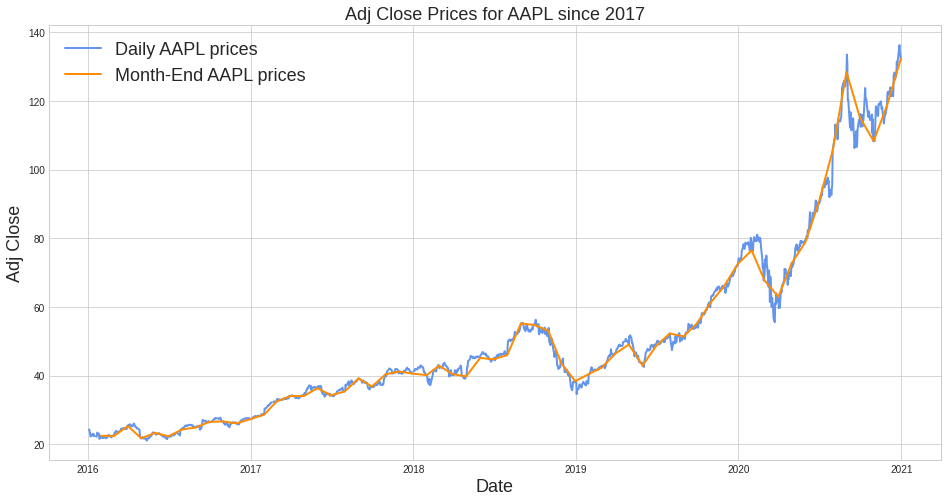

In [10]:
plt.figure(figsize=(16,8))
plt.plot(df.loc[:,"AAPL"], alpha=1.0, label="Daily AAPL prices", linewidth=2, color="cornflowerblue", zorder=1)
plt.plot(monthly_df.loc[:,"AAPL"], alpha=1.0, label="Month-End AAPL prices", linewidth=2, color="darkorange", zorder=2)
plt.legend(fontsize=18)
plt.title("Adj Close Prices for AAPL since 2017", fontsize=18)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Adj Close", fontsize=18)
plt.show()

## Compute log returns

In [11]:
def compute_log_returns(prices):
  """
    Compute log returns for each ticker.
    
    Parameters
    ----------
    prices : DataFrame
        Prices for each ticker and date
    
    Returns
    -------
    log_returns : DataFrame
        Log returns for each ticker and date
  """

  return np.log(prices/prices.shift(1))

In [12]:
monthly_log_returns = compute_log_returns(monthly_df)
monthly_log_returns

,DHI,PG,FTV,PAYX,O,FANG,ICE,AAP,L,ESS,EMN,CRM,GRMN,AIG,RMD,LW,AEE,FRT,GIS,AVGO,CMI,HRL,MA,WU,OKE,PFE,ULTA,BLK,HLT,LIN,OTIS,MGM,WYNN,NTAP,ALL,CNP,EOG,AON,ZBH,WMB,...,AVY,JCI,WY,WAT,GOOG,F,UDR,LEN,GPN,ES,FDX,BF-B,BBWI,UHS,NSC,STT,MTD,WRK,RJF,SPG,TXN,MSI,IPG,LLY,GD,AMGN,MAS,ROL,EVRG,MPC,TER,AMZN,NWS,LNT,PAYC,PCAR,MLM,ZTS,FB,PSX
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-29,-0.026077,-0.017286,NaN,0.071163,0.051431,-0.058600,-0.100990,-0.024029,-0.016264,-0.018135,0.046914,-0.004565,0.141071,-0.117871,0.008970,NaN,0.044200,-0.018536,0.040574,0.001943,0.091867,0.055748,-0.023985,0.023270,-0.037215,-0.017259,-0.092339,-0.007346,0.154231,0.017742,NaN,-0.058976,0.209195,0.124599,0.051289,0.055686,-0.092582,0.081522,-0.024992,-0.188142,...,0.072746,0.022712,0.014344,-0.007453,-0.062739,0.046634,-0.036045,-0.004995,0.033555,0.017409,0.029658,0.006418,NaN,-0.019460,0.046071,-0.017194,0.006563,-0.032206,0.000685,0.027333,0.001699,0.095895,-0.040947,-0.087106,0.018516,-0.063945,0.066337,0.003098,-0.002298,-0.188537,-0.014955,-0.060535,-0.157026,0.039168,0.055794,0.053161,0.130032,-0.047328,-0.048291,-0.002062
2016-03-31,0.123422,0.024847,NaN,0.049726,0.068787,0.079945,-0.010412,0.077494,0.051211,0.118083,0.125283,0.085941,0.012141,0.080117,0.015864,NaN,0.073954,0.058683,0.073683,0.145884,0.119365,0.017027,0.083612,0.063286,0.218466,-0.001012,0.159421,0.094779,0.085270,0.124454,NaN,0.124511,0.124657,0.094065,0.059790,0.115933,0.114310,0.091783,0.098917,0.041276,...,0.101961,0.050707,0.187452,0.092124,0.065428,0.076161,0.115417,0.142433,0.068938,0.071764,0.174689,0.003475,NaN,0.122233,0.129063,0.071873,0.090562,0.144758,0.086695,0.090445,0.079723,0.035403,0.070395,0.000139,-0.036621,0.052371,0.109077,-0.015005,0.141168,0.082084,0.123589,0.071783,0.158069,0.089069,0.110367,0.060099,0.111923,0.076627,0.064994,0.086811
2016-04-30,-0.005639,-0.018808,NaN,-0.035620,-0.051052,0.114929,0.020583,-0.026800,0.036443,-0.059052,0.055865,0.026333,0.064679,0.032223,-0.035561,NaN,-0.042820,-0.025770,-0.025045,-0.058302,0.062496,-0.111162,0.028024,0.036145,0.207887,0.098556,0.072366,0.045236,-0.021091,0.025960,NaN,-0.006551,-0.056472,-0.136798,-0.035043,0.025019,0.131732,0.009563,0.082241,0.187803,...,0.006910,0.053726,0.036137,-0.013431,-0.072273,0.015404,-0.090625,-0.064302,0.100171,-0.033110,0.014581,-0.022076,NaN,0.069378,0.079183,0.062593,0.037545,0.069761,0.091465,-0.031896,-0.000278,-0.006760,-0.000436,0.047725,0.073158,0.054324,-0.020790,-0.009261,0.039523,0.049840,-0.132539,0.105345,-0.022130,-0.043393,0.070752,0.074330,0.059152,0.061202,0.030044,-0.053124
2016-05-31,0.019191,0.011417,NaN,0.047566,0.018250,0.049241,0.121798,-0.014584,0.021519,0.030292,-0.040342,0.099260,-0.002584,0.036240,0.061958,NaN,0.031781,0.007272,0.023204,0.057395,-0.013549,-0.113609,-0.011302,-0.027885,0.179320,0.067974,0.112198,0.020885,-0.054605,-0.066891,NaN,0.070244,0.090848,0.076914,0.037119,0.060914,-0.015368,0.038719,0.053317,0.133531,...,0.029613,0.101146,-0.019491,0.055223,0.059805,-0.005175,0.031292,0.005722,0.073698,-0.013262,-0.000848,0.018005,NaN,0.009533,-0.062859,0.012125,0.047386,0.058696,0.072093,-0.009831,0.060542,-0.082007,0.047402,0.000014,0.009561,0.004348,0.060950,0.059789,0.087512,-0.106074,0.049576,0.091500,-0.049022,0.049519,0.056722,-0.050915,0.112789,0.008258,0.010407,-0.013469
2016-06-30,0.029661,0.043819,NaN,0.092927,0.146404,0.002855,-0.054273,0.049790,0.014957,0.011126,-0.071013,-0.052734,0.009799,-0.084520,0.068225,NaN,0.086730,0.083587,0.127540,0.009865,-0.017893,0.061701,-0.085288,-0.005549,0.092679,0.014590,0.044610,-0.054081,0.080857,0.029575,NaN,-0.009675,-0.0

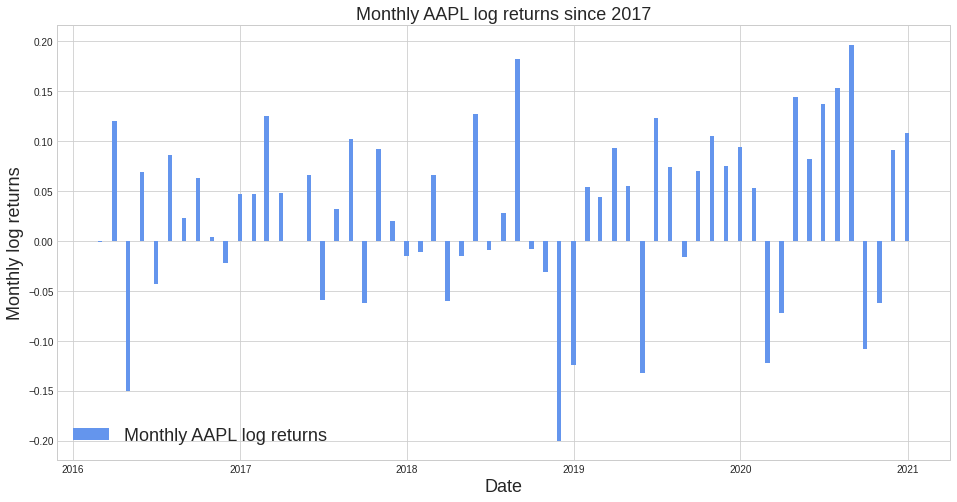

In [13]:
plt.figure(figsize=(16,8))
plt.bar(monthly_log_returns.index, monthly_log_returns.loc[:,"AAPL"], alpha=1.0, label="Monthly AAPL log returns", width=10, color="cornflowerblue", zorder=1)
plt.legend(fontsize=18)
plt.title("Monthly AAPL log returns since 2017", fontsize=18)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Monthly log returns", fontsize=18)
plt.show()

## Shift returns

In [14]:
def shift_returns(returns, shift_n):
  """
    Generate shifted returns
    
    Parameters
    ----------
    returns : DataFrame
        Returns for each ticker and date
    shift_n : int
        Number of periods to move, can be positive or negative
    
    Returns
    -------
    shifted_returns : DataFrame
        Shifted returns for each ticker and date
  """

  return returns.shift(shift_n)

In [15]:
previous_returns = shift_returns(monthly_log_returns, 1)
lookahead_returns = shift_returns(monthly_log_returns, -1)

## Generate trading signal

For each month-end observation period, rank the stocks by previous returns, from the highest to the lowest. Select the top performing stocks for the long portfolio, and the bottom performing stocks for the short portfolio


In [16]:
def get_top_n(prev_returns, top_n):
  """
    Select the top performing stocks
    
    Parameters
    ----------
    prev_returns : DataFrame
        Previous shifted returns for each ticker and date
    top_n : int
        The number of top performing stocks to get
    
    Returns
    -------
    top_stocks : DataFrame
        Top stocks for each ticker and date marked with a 1
  """

  top_stocks = prev_returns.copy()

  for date, row in prev_returns.iterrows():
    top_tickers = prev_returns.loc[date, :].nlargest(top_n).index
    for ticker in prev_returns.columns:
      if ticker in top_tickers:
        top_stocks.loc[date, ticker] = 1
      else:
        top_stocks.loc[date, ticker] = 0
  
  return top_stocks

In [17]:
top_bottom_n = 50
df_long = get_top_n(previous_returns, top_bottom_n)
df_short = get_top_n((-1)*previous_returns, top_bottom_n)

In [18]:
df_long

,DHI,PG,FTV,PAYX,O,FANG,ICE,AAP,L,ESS,EMN,CRM,GRMN,AIG,RMD,LW,AEE,FRT,GIS,AVGO,CMI,HRL,MA,WU,OKE,PFE,ULTA,BLK,HLT,LIN,OTIS,MGM,WYNN,NTAP,ALL,CNP,EOG,AON,ZBH,WMB,...,AVY,JCI,WY,WAT,GOOG,F,UDR,LEN,GPN,ES,FDX,BF-B,BBWI,UHS,NSC,STT,MTD,WRK,RJF,SPG,TXN,MSI,IPG,LLY,GD,AMGN,MAS,ROL,EVRG,MPC,TER,AMZN,NWS,LNT,PAYC,PCAR,MLM,ZTS,FB,PSX
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2016-04-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-31,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-06-30,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2016-07-31,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2016-09-30,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df_short

,DHI,PG,FTV,PAYX,O,FANG,ICE,AAP,L,ESS,EMN,CRM,GRMN,AIG,RMD,LW,AEE,FRT,GIS,AVGO,CMI,HRL,MA,WU,OKE,PFE,ULTA,BLK,HLT,LIN,OTIS,MGM,WYNN,NTAP,ALL,CNP,EOG,AON,ZBH,WMB,...,AVY,JCI,WY,WAT,GOOG,F,UDR,LEN,GPN,ES,FDX,BF-B,BBWI,UHS,NSC,STT,MTD,WRK,RJF,SPG,TXN,MSI,IPG,LLY,GD,AMGN,MAS,ROL,EVRG,MPC,TER,AMZN,NWS,LNT,PAYC,PCAR,MLM,ZTS,FB,PSX
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-03-31,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-04-30,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2016-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-08-31,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2016-09-30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Projected returns

Compute the net returns this portfolio would return. For simplicity, we'll assume every stock gets an equal dollar amount of investment. This makes it easier to compute a portfolio's returns as the simple arithmetic average of the individual stock returns.

In [20]:
def portfolio_returns(df_long, df_short, lookahead_returns, n_stocks):
  """
    Compute expected returns for the portfolio, assuming equal investment in each long/short stock.
    
    Parameters
    ----------
    df_long : DataFrame
        Top stocks for each ticker and date marked with a 1
    df_short : DataFrame
        Bottom stocks for each ticker and date marked with a 1
    lookahead_returns : DataFrame
        Lookahead returns for each ticker and date
    n_stocks: int
        The number number of stocks chosen for each month
    
    Returns
    -------
    portfolio_returns : DataFrame
        Expected portfolio returns for each ticker and date
  """

  long_returns = df_long * lookahead_returns
  short_returns = df_short * lookahead_returns * (-1)
  pfolio_returns = (long_returns + short_returns) / n_stocks
  return pfolio_returns

In [21]:
expected_pfolio_returns = portfolio_returns(df_long, df_short, lookahead_returns, 2*top_bottom_n)
expected_pfolio_returns

,DHI,PG,FTV,PAYX,O,FANG,ICE,AAP,L,ESS,EMN,CRM,GRMN,AIG,RMD,LW,AEE,FRT,GIS,AVGO,CMI,HRL,MA,WU,OKE,PFE,ULTA,BLK,HLT,LIN,OTIS,MGM,WYNN,NTAP,ALL,CNP,EOG,AON,ZBH,WMB,...,AVY,JCI,WY,WAT,GOOG,F,UDR,LEN,GPN,ES,FDX,BF-B,BBWI,UHS,NSC,STT,MTD,WRK,RJF,SPG,TXN,MSI,IPG,LLY,GD,AMGN,MAS,ROL,EVRG,MPC,TER,AMZN,NWS,LNT,PAYC,PCAR,MLM,ZTS,FB,PSX
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-31,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-02-29,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-03-31,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,-0.000206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000647,-0.000322,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000724,0.000000,-0.000211,0.000000,NaN,0.000000,-0.000565,-0.001368,0.000000,0.000000,-0.001317,0.000000,0.000000,-0.001878,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000068,0.000000,-4.772499e-04,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000498,0.000000,0.000000,0.000221,0.000000,0.000000,0.000000,0.000592,0.000000,0.000000,0.000000
2016-04-30,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,-0.001218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000026,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000574,0.000000,0.000000,0.000000,0.000000,0.001793,-0.000680,0.001122,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.000195,0.000000,0.000000,0.000000,0.000000,0.000057,0.000000,0.000000,-0.000008,-0.000180,NaN,0.000000,0.000000,0.000000,0.000000,0.000587,0.000000,0.000000,0.000000,0.000000,0.000000,-1.399823e-07,-0.000096,0.000000,0.000000,-0.000598,0.000875,0.000000,0.000000,0.000000,-0.000490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-05-31,0.000000,0.000000,NaN,0.000000,0.000000,0.000029,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000617,0.000000,0.000000,0.000927,0.000146,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000375,0.000000,0.000000,0.000250,0.000000,0.000000,0.000056,...,0.000000,0.000000,0.000000,0.000000,0.000611,0.000000,-0.000244,0.000000,-0.000847,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,-0.001244,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000061,-0.000100,0.000000,0.000000,0.000000,0.000000,0.0

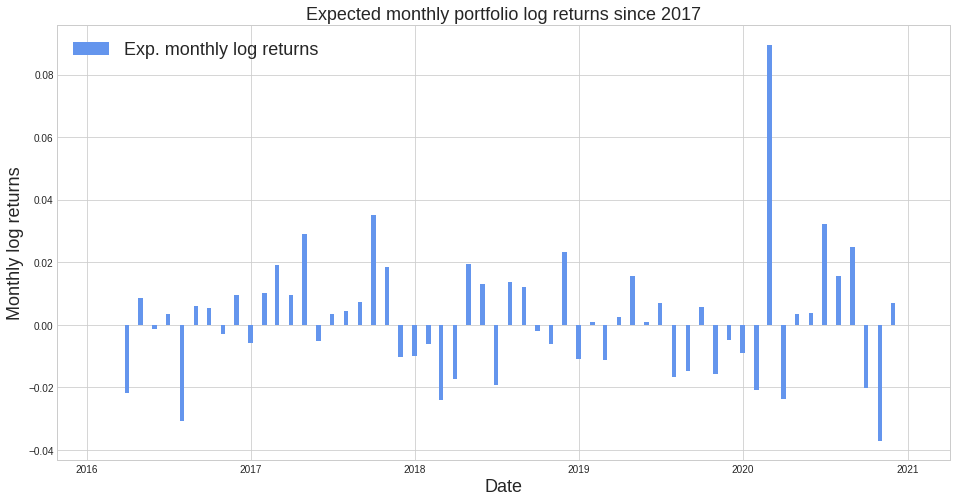

In [22]:
plt.figure(figsize=(16,8))
plt.bar(expected_pfolio_returns.index, expected_pfolio_returns.sum(axis=1), alpha=1.0, label="Exp. monthly log returns", width=10, color="cornflowerblue", zorder=1)
plt.legend(fontsize=18)
plt.title("Expected monthly portfolio log returns since 2017", fontsize=18)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Monthly log returns", fontsize=18)
plt.show()

## Statistical tests

In [23]:
# sum returns across all stocks for each date
expected_pfolio_returns_by_date = expected_pfolio_returns.sum(axis=1)

# compute mean monthly portfolio return
portfolio_return_mean = expected_pfolio_returns_by_date.mean()

# compute standard error of mean monthly portfolio return
portfolio_return_stderr = expected_pfolio_returns_by_date.sem()

# take exponential to undo log returns for actual returns
# multiply by 12 for annual return
# subtract 1 for returns without initial investment
# multiply by 100 for percentage
portfolio_return_annual_rate = (np.exp(portfolio_return_mean*12) - 1) * 100

print("""
Mean:                       {:.6f}
Standard Error:             {:.6f}
Annualized Rate of Return:  {:.2f}%
""".format(portfolio_return_mean, portfolio_return_stderr, portfolio_return_annual_rate))


Mean:                       0.001854
Standard Error:             0.002478
Annualized Rate of Return:  2.25%



## T-test

Our null hypothesis ($H_0$) is that the actual mean return from the signal is zero. We'll perform a one-sample, one-sided t-test on the observed mean return, to see if we can reject $H_0$.

We'll need to first compute the t-statistic, and then find its corresponding p-value. The p-value will indicate the probability of observing a mean return equally or more extreme than the one we observed if the null hypothesis were true. A small p-value means that the chance of observing the mean we observed under the null hypothesis is small, and thus casts doubt on the null hypothesis. It's good practice to set a desired level of significance or alpha ($\alpha$) before computing the p-value, and then reject the null hypothesis if $p < \alpha$.

For this project, we'll use $\alpha = 0.05$, since it's a common value to use.

In [24]:
def check_statistical_significance(expected_pfolio_returns_by_date):
  """
    Perform a t-test with the null hypothesis being that the expected mean return is zero.
    
    Parameters
    ----------
    expected_portfolio_returns_by_date : Pandas Series
        Expected portfolio returns for each date
    
    Returns
    -------
    t_value
        T-statistic from t-test
    p_value
        Corresponding p-value
  """

  H0 = 0.0
  t_test = stats.ttest_1samp(a=expected_pfolio_returns_by_date, popmean=[H0])
  t = t_test[0].item(0)
  p = t_test[1].item(0)/2 # stats.ttest_1samp performs two-sided test, so divide p-value by 2

  return (t, p)

In [25]:
t_value, p_value = check_statistical_significance(expected_pfolio_returns_by_date)

print("""
Alpha analysis:
 t-value:        {:.3f}
 p-value:        {:.6f}
""".format(t_value, p_value))


Alpha analysis:
 t-value:        0.748
 p-value:        0.228691



A p-value, or probability value, is a number describing how likely it is that your data would have occurred by random chance (i.e. that the null hypothesis is true). The level of statistical significance is often expressed as a p-value between 0 and 1. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis.

- A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis.

- A p-value higher than 0.05 (> 0.05) is not statistically significant and indicates strong evidence for the null hypothesis. This means we retain the null hypothesis and reject the alternative hypothesis. You should note that you cannot accept the null hypothesis, we can only reject the null or fail to reject it.

- A statistically significant result cannot prove that a research hypothesis is correct (as this implies 100% certainty). Instead, we may state our results “provide support for” or “give evidence for” our research hypothesis (as there is still a slight probability that the results occurred by chance and the null hypothesis was correct – e.g. less than 5%).
